In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

cdl_df = pd.read_csv("Credit_card_label.csv")
cd_df = pd.read_csv("Credit_card.csv")
cd_df


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [273]:


df = pd.merge(cd_df, cdl_df, on='Ind_ID', how="outer")
df = df.drop(columns=['Ind_ID','Mobile_phone'], axis=1)
df.head()



,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,NaN,2,1
1,F,Y,Y,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,-15761.0,-3173,0,0,0,Laborers,4,0
2,F,N,Y,0,247500.0,Commercial associate,Higher education,Separated,Rented apartment,-17016.0,-1347,0,0,0,Core staff,1,0
3,M,Y,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-9927.0,-828,0,0,0,Drivers,2,0
4,F,N,Y,2,216000.0,State servant,Higher education,Married,House / apartment,-15444.0,-3112,0,0,1,NaN,4,0


In [274]:
from sklearn.impute import SimpleImputer

imputer =  SimpleImputer(missing_values=np.nan, strategy='mean')
cols_to_impute_numeric = ['Annual_income','Birthday_count']
df[cols_to_impute_numeric] = imputer.fit_transform(df[cols_to_impute_numeric])

num_columns = df.select_dtypes(include=['int','float']).columns.tolist()

cat_columns = df.select_dtypes(include=['O']).columns.tolist()

<Axes: >

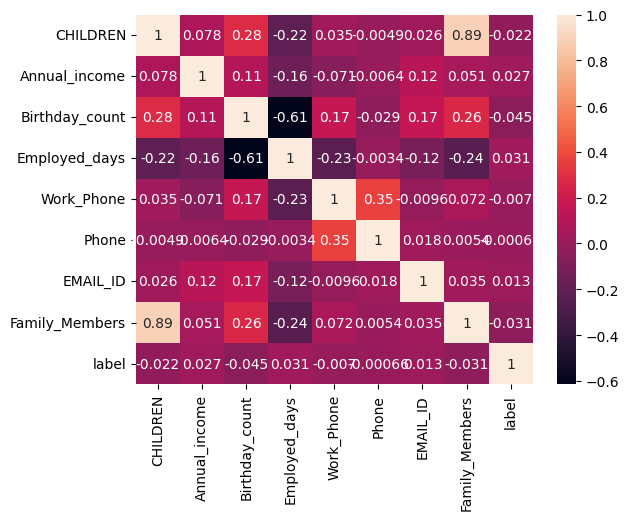

In [275]:
correlation = df[num_columns].corr()
sns.heatmap(correlation, annot=True)

Problem 1

In [276]:

label_encd_cols = ['GENDER', 'Car_Owner', 'Propert_Owner']
ohe_cols = ['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

In [277]:


from sklearn.preprocessing import LabelEncoder  
lb_encoder = LabelEncoder()
for coln in label_encd_cols:
    df[coln] = lb_encoder.fit_transform(df[coln])
    
df = pd.get_dummies(df, dtype=int)
df.reset_index(drop=True)
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,1,1,1,0.0,180000.0,-18772.0,365243.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,1,2.0,135000.0,-15761.0,-3173.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0.0,247500.0,-17016.0,-1347.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0.0,157500.0,-9927.0,-828.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,2.0,216000.0,-15444.0,-3112.0,0.0,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0


Problem 2

In [278]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [279]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)          
y_pred = model.predict(X_test)
accuracy_score = model.score(y_pred, y_test)
print(accuracy_score)



c:\Users\tonyp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[-5.07260900e-13 -6.04294392e-13  1.51678670e-12 -2.55018229e-12
  6.35713704e-13  7.38853423e-13  2.02748929e-12  2.18070006e-12
  9.37250277e-13 -1.56852309e-12 -6.78124223e-13  7.88258347e-13
 -1.64090963e-13 -3.70037334e-13 -7.08322290e-13 -6.17950136e-13
 -4.65738559e-13  2.18280949e-12 -7.81374965e-13 -6.55031585e-14
 -1.18260957e-12 -8.64419647e-13 -3.90576460e-13  7.75712827e-13
 -3.13349346e-12 -4.61630734e-13 -6.58140209e-13 -4.88276086e-13
 -2.58681965e-14 -3.14193116e-12 -2.13518092e-12 -2.14273044e-13
 -1.12132525e-12 -3.20166116e-12  1.86839433e-12 -2.83373325e-12
 -1.11044507e-12 -1.65090164e-12 -1.20303767e-12 -1.84385840e-12
 -8.74522676e-13  7.35078665e-13 -5.26356736e-13 -6.09623463e-13
  3.57192054e-12 -1.80799820e-12 -8.62754312e-13 -3.48188145e-12
 -6.75903777e-13  5.26467758e-13 -9.50461931e-13 -5.69211345e-13
  1.53854707e-12 -6.95887792e-13 -6.78457290e-13  4.86677365e-12
 -1.57851510e-12 -1.03572706e-12 -1.50424118e-12 -1.36646250e-12
  3.19233529e-12 -7.54618590e-13  1.81410442e-13  7.46291917e-13
 -2.75224288e-13 -1.36646250e-12  3.02302627e-12  6.33049169e-13
 -7.63056285e-13  1.07691633e-13  3.39950290e-13 -1.25699451e-12
 -6.58806343e-13 -2.23931984e-13 -2.01749728e-12 -1.17295063e-12
 -8.13460410e-13  6.25055563e-13 -1.06981091e-12  2.89768209e-14
  2.64566147e-13  1.51101354e-13 -5.27577981e-13 -1.20270460e-12
 -1.05471187e-13  6.06070749e-13 -1.08146825e-12 -2.06235029e-12
 -2.06989981e-12 -2.28461694e-12 -3.35687034e-12 -2.12052598e-14
 -2.28461694e-12 -7.03104241e-13 -2.08566497e-12 -9.10604925e-13
 -4.79061235e-13  4.88498131e-15 -1.24689148e-12  2.51454413e-12
 -1.41298084e-12  6.43818332e-13  7.75601805e-13 -5.78670445e-12
 -1.23834276e-12  3.35831363e-12  2.81885626e-12 -2.00306438e-12
 -2.23088215e-12 -6.12287998e-13 -8.38884517e-13 -6.91668944e-14
  2.04392059e-13  1.81810123e-12 -1.58761893e-13 -7.64610597e-13
  7.05768777e-13  1.05981890e-12 -2.41029419e-13 -1.71307413e-12
 -1.04083409e-12  3.41626727e-12 -2.30593322e-13 -6.68243239e-13
 -1.29973809e-12 -7.95363775e-13 -6.50368648e-13  9.62230295e-13
 -1.08291154e-12 -1.71196390e-13 -2.94320124e-13  1.33226763e-15
 -2.42161846e-12 -9.00390873e-13 -2.01727524e-12 -1.92457161e-12
  1.44084744e-12 -5.32796030e-13 -1.64057656e-12  7.51954055e-13
 -7.12763182e-13 -1.36035627e-12  3.22308846e-12 -5.46562795e-13
  3.64985819e-12 -2.03215222e-12 -3.35953487e-13 -1.28452804e-13
  4.70734562e-14  5.41566791e-13  1.00452979e-12 -4.87054841e-13
 -1.04116715e-12  1.00000000e+00 -1.26043620e-12 -7.50621787e-13
  2.04725126e-13 -1.29418698e-12 -1.24822375e-12  9.81437154e-13
  2.75668377e-13 -1.76958448e-12  2.31037411e-13  2.39142040e-13
 -1.88360438e-12  1.67865721e-13 -2.10942375e-15  1.43107748e-13
 -3.67372799e-13 -1.08246745e-13 -7.99693645e-13  3.21587201e-12
 -6.83453294e-13  8.97948382e-13  1.35935707e-12 -2.09654516e-12
  6.25732799e-12  6.53477272e-13 -8.55981952e-13 -6.24722496e-13
  4.88176166e-12 -1.98041583e-12  4.38460379e-12 -6.09179374e-13
 -2.11852758e-12  1.52056145e-12 -3.33399974e-13  5.59219338e-13
  6.59028387e-13  6.31539265e-12 -1.84385840e-12 -7.63056285e-13
 -5.03819209e-13 -8.86291041e-13  6.50812737e-13 -3.85913523e-13
 -8.34776692e-13 -3.62265773e-13 -1.87849736e-13 -2.23088215e-12
  8.62643290e-14 -1.34947609e-12 -4.31654712e-12 -9.91207116e-13
 -1.55686575e-12 -1.22057919e-12 -4.26436664e-13 -1.64024350e-12
 -7.89590615e-13 -9.40025835e-13  4.92039742e-12 -2.35700348e-12
 -1.50823798e-12 -8.02136135e-13 -1.74538162e-12 -8.78186412e-13
 -1.50479629e-12 -2.98983061e-13  1.15907284e-13 -1.96287431e-13
  3.10418358e-13  1.23345778e-12 -3.28403971e-13  3.89166477e-12
 -8.03579425e-13  3.00315328e-13  1.27609034e-12 -1.41298084e-12
 -7.54396545e-13  1.66366920e-12  2.74003042e-12  4.13358237e-12
  3.11639603e-13 -1.31683553e-12  1.85129689e-12 -3.67150754e-13
 -4.96380714e-13 -1.53432822e-12  3.21298543e-13 -1.96287431e-13
 -8.07909295e-13 -3.61599639e-13 -1.01563202e-12 -1.81754611e-12
  5.76327874e-12  1.25777166e-12 -3.33733041e-13 -2.12785345e-12
 -1.86217708e-12  1.53266289e-12 -1.38666856e-13 -9.65894031e-15
  1.99773531e-12 -4.32320846e-13 -8.25006730e-13 -5.10480547e-13
 -1.80966353e-14 -9.25814980e-13 -1.57995839e-12 -2.92366131e-12
 -4.28657110e-13  4.10782519e-15 -2.28461694e-12 -4.41202630e-13
  5.11146681e-13 -4.15467660e-12 -9.34474720e-13 -1.59072755e-12
  6.58695321e-13 -1.21991306e-12 -2.69073652e-12  3.82804899e-13
  9.62230295e-13 -1.01030295e-12 -3.39994699e-12 -3.53717056e-13
  8.29891711e-13  7.63944463e-13 -5.24802424e-12 -2.28039809e-13
  7.37521155e-13  7.44959650e-13 -3.13793436e-12 -1.39732670e-12
 -1.08002496e-12 -5.28910249e-13  9.45910017e-14 -1.29740663e-12
 -5.58442181e-14 -3.28692629e-12  4.31044089e-12  3.89066557e-12
  4.32820446e-12 -1.23834276e-12  1.86839433e-12 -2.28328467e-12
 -2.17093010e-12 -2.70117262e-13  3.05111492e-12  9.90318938e-13
  1.27819977e-12 -6.91224855e-13  6.66355859e-13 -8.51652082e-13
 -1.01152420e-12  6.32416342e-12  6.41708908e-14  5.61439784e-13
 -3.51607632e-12 -8.74522676e-13].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.metrics import r2_score